In [ ]:
import pandas as pd

# read vuln
df = pd.read_csv('/content/drive/MyDrive/Cyber Security/vulnerabilities.csv')

print(df.tail())

<ipython-input-1-1793204101>:4: DtypeWarning: Columns (26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Cyber Security/vulnerabilities.csv')


        Unnamed: 0              id  baseScoreAv  exploitScoreAv  \
404785       13446  CVE-2025-28410          9.8             3.9   
404786       13447  CVE-2025-28943          5.9             1.7   
404787       13448  CVE-2025-28406          9.8             3.9   
404788       13449  CVE-2025-28902          4.3             2.8   
404789       13450  CVE-2025-28144          6.5             3.9   

        impactScoreAv  baseScoreMax  exploitScoreMax  impactScoreMax  version  \
404785            5.9           9.8              3.9             5.9      3.1   
404786            3.7           5.9              1.7             3.7      3.1   
404787            5.9           9.8              3.9             5.9      3.1   
404788            1.4           4.3              2.8             1.4      3.1   
404789            2.5           6.5              3.9             2.5      3.1   

                                        vectorString  ...  \
404785  CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/

In [ ]:
print(df['description'].tail())

404785    An issue in RUoYi v.4.8.0 allows a remote atta...
404786    Improper Neutralization of Input During Web Pa...
404787    An issue in RUoYi v.4.8.0 allows a remote atta...
404788    Cross-Site Request Forgery (CSRF) vulnerabilit...
404789    Edimax AC1200 Wave 2 Dual-Band Gigabit Router ...
Name: description, dtype: object


In [ ]:
# create

In [ ]:
# Drop column Unamed: 0
df = df.drop(columns=['Unnamed: 0'])

print(df.head())

              id  baseScoreAv  exploitScoreAv  impactScoreAv  baseScoreMax  \
0  CVE-1999-0217          5.0            10.0            2.9           5.0   
1  CVE-1999-0702         10.0            10.0           10.0          10.0   
2  CVE-1999-0352          7.2             3.9           10.0           7.2   
3  CVE-1999-0978          7.5            10.0            6.4           7.5   
4  CVE-1999-0581         10.0            10.0           10.0          10.0   

   exploitScoreMax  impactScoreMax  version                vectorString  \
0             10.0             2.9      2.0  AV:N/AC:L/Au:N/C:N/I:N/A:P   
1             10.0            10.0      2.0  AV:N/AC:L/Au:N/C:C/I:C/A:C   
2              3.9            10.0      2.0  AV:L/AC:L/Au:N/C:C/I:C/A:C   
3             10.0             6.4      2.0  AV:N/AC:L/Au:N/C:P/I:P/A:P   
4             10.0            10.0      2.0  AV:N/AC:L/Au:N/C:C/I:C/A:C   

  baseSeverity  ... modifiedVulnAvailabilityImpact  \
0          NaN  ...       

In [ ]:
df.shape

(404790, 53)

In [ ]:
# count null values for each column
print(df.isnull().sum())

id                                        0
baseScoreAv                               0
exploitScoreAv                         6391
impactScoreAv                          6391
baseScoreMax                              0
exploitScoreMax                        6391
impactScoreMax                         6391
version                                   0
vectorString                              0
baseSeverity                         186366
attackVector                         186366
attackComplexity                     186366
privilegesRequired                   186366
userInteractions                     404790
scope                                192757
confidentialityImpact                  6391
integrityImpact                        6391
availabilityImpact                     6391
numScores                                 0
agreement                                 0
accessVector                         218424
accessComplexity                     218424
authentication                  

<ipython-input-6-3064269162>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_by_year = df.groupby('year').apply(lambda x: x.isnull().sum())


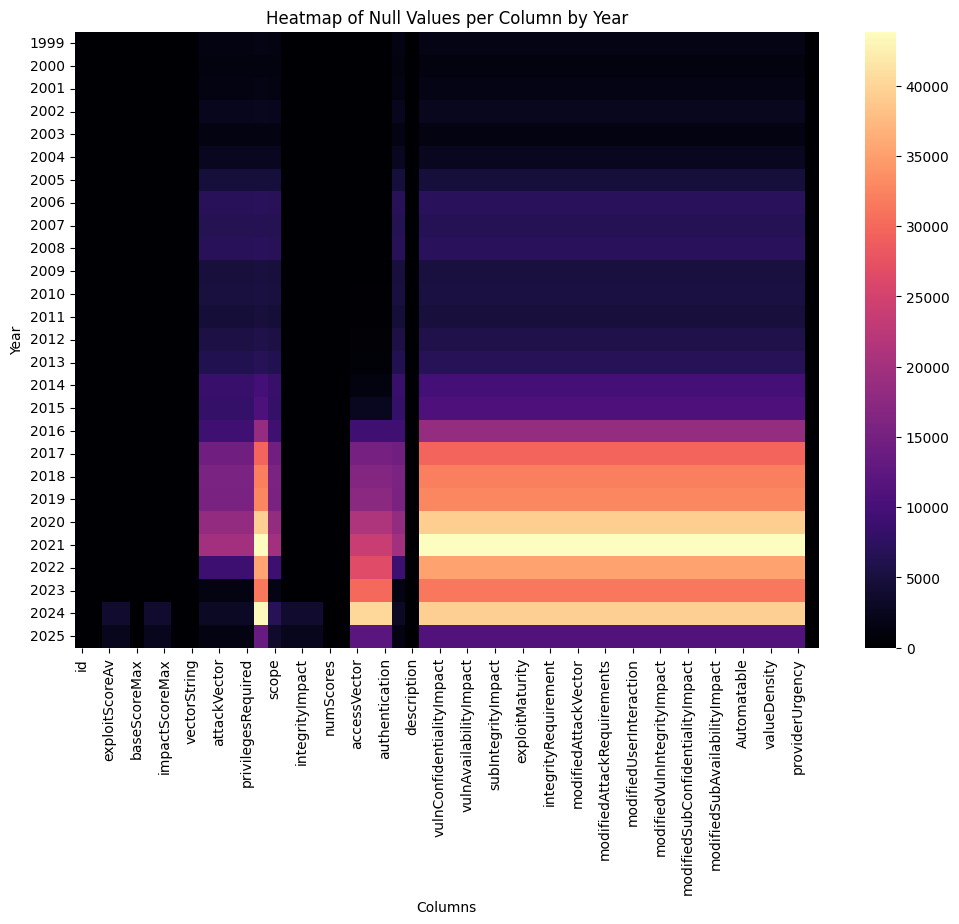

In [ ]:
# Create a heatmap showing the number of null values for each volumn aggregated by year
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from the 'id' column
df['year'] = df['id'].str.extract(r'CVE-(\d{4})-')[0].astype(int)

# Group by year and count nulls
null_counts_by_year = df.groupby('year').apply(lambda x: x.isnull().sum())

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(null_counts_by_year, cmap='magma')
plt.title('Heatmap of Null Values per Column by Year')
plt.xlabel('Columns')
plt.ylabel('Year')
plt.show()

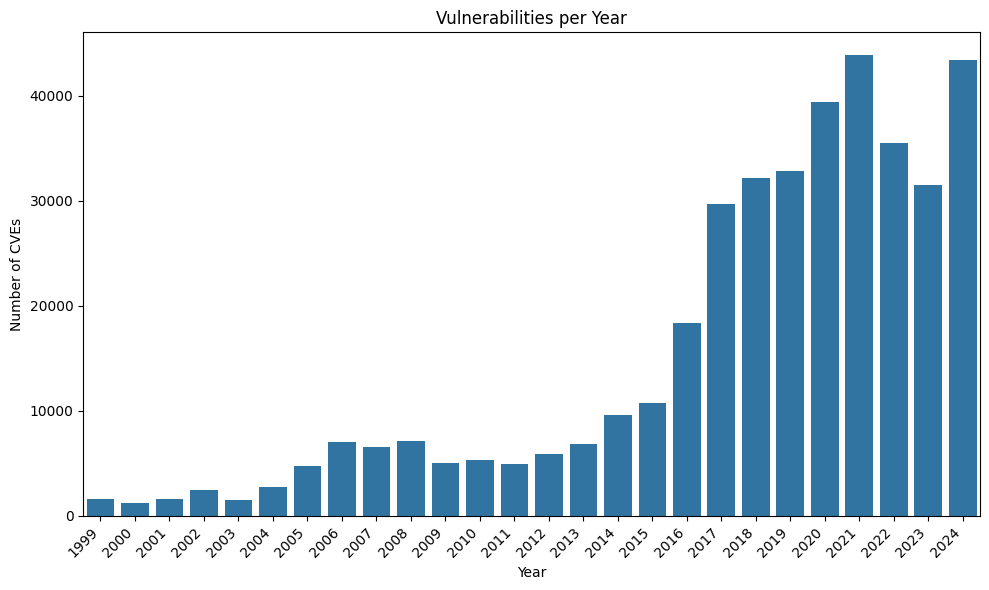

In [ ]:
# create a bar chart of CVE per year using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[df['year'] != 2025]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='year')
plt.title('Vulnerabilities per Year')
plt.xlabel('Year')
plt.ylabel('Number of CVEs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
print(null_counts_by_year)

      id  baseScoreAv  exploitScoreAv  impactScoreAv  baseScoreMax  \
year                                                                 
1999   0            0               0              0             0   
2000   0            0               0              0             0   
2001   0            0               0              0             0   
2002   0            0               0              0             0   
2003   0            0               0              0             0   
2004   0            0               0              0             0   
2005   0            0               1              1             0   
2006   0            0               0              0             0   
2007   0            0               0              0             0   
2008   0            0               0              0             0   
2009   0            0               0              0             0   
2010   0            0               0              0             0   
2011   0            

In [ ]:
# Drop year column
#df = df.drop(columns=['year'])

print(df.columns)

Index(['id', 'baseScoreAv', 'exploitScoreAv', 'impactScoreAv', 'baseScoreMax',
       'exploitScoreMax', 'impactScoreMax', 'version', 'vectorString',
       'baseSeverity', 'attackVector', 'attackComplexity',
       'privilegesRequired', 'userInteractions', 'scope',
       'confidentialityImpact', 'integrityImpact', 'availabilityImpact',
       'numScores', 'agreement', 'accessVector', 'accessComplexity',
       'authentication', 'userInteraction', 'description',
       'attackRequirements', 'vulnConfidentialityImpact',
       'vulnIntegrityImpact', 'vulnAvailabilityImpact',
       'subConfidentialityImpact', 'subIntegrityImpact',
       'subAvailabilityImpact', 'exploitMaturity',
       'confidentialityRequirement', 'integrityRequirement',
       'availabilityRequirement', 'modifiedAttackVector',
       'modifiedAttackComplexity', 'modifiedAttackRequirements',
       'modifiedPrivilegesRequired', 'modifiedUserInteraction',
       'modifiedVulnConfidentialityImpact', 'modifiedVulnInteg

In [ ]:
# Create a dataframe of just the descriptions and save it as a seperate file
descriptions_df = df[['description']].copy()

# Save the new DataFrame to a CSV file
descriptions_df.to_csv('descriptions_only.csv', index=False)

In [ ]:
descriptions_df.head()

,description
0,Malicious option settings in UDP packets could...
1,Internet Explorer 5.0 and 5.01 allows remote a...
2,ControlIT 4.5 and earlier (aka Remotely Possib...
3,htdig allows remote attackers to execute comma...
4,The HKEY_CLASSES_ROOT key in a Windows NT syst...


In [ ]:
descriptions_df.shape

(404790, 1)

In [ ]:
df.shape

(404790, 53)

In [ ]:
df.to_csv('vulnerabilities_cleaned.csv', index=False)

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Iterate through the numerical columns and convert their type
for col in numerical_cols:
    try:
        # Attempt to convert the column to the desired dtype
        df[col] = df[col].astype('float')
        print(f"Converted column '{col}' to 'float'")
    except ValueError as e:
        # Handle cases where conversion might fail (e.g., non-numeric values)
        print(f"Could not convert column '{col}' to 'float'. Error: {e}")
        # You might want to inspect these columns to understand why they failed

# Verify the data types after conversion
print("\nData types after standardization:")
print(df.dtypes)

Converted column 'baseScoreAv' to 'float'
Converted column 'exploitScoreAv' to 'float'
Converted column 'impactScoreAv' to 'float'
Converted column 'baseScoreMax' to 'float'
Converted column 'exploitScoreMax' to 'float'
Converted column 'impactScoreMax' to 'float'
Converted column 'version' to 'float'
Converted column 'userInteractions' to 'float'
Converted column 'numScores' to 'float'
Converted column 'agreement' to 'float'

Data types after standardization:
id                                    object
baseScoreAv                          float64
exploitScoreAv                       float64
impactScoreAv                        float64
baseScoreMax                         float64
exploitScoreMax                      float64
impactScoreMax                       float64
version                              float64
vectorString                          object
baseSeverity                          object
attackVector                          object
attackComplexity                      ob

In [ ]:
import pandas as pd

# read vuln
df = pd.read_csv('/content/drive/MyDrive/Cyber Security/vulnerabilities_cleaned.csv')

print(df.tail())

<ipython-input-1-1a9ee300a715>:4: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Cyber Security/vulnerabilities_cleaned.csv')


                    id  baseScoreAv  exploitScoreAv  impactScoreAv  \
404785  CVE-2025-28410          9.8             3.9            5.9   
404786  CVE-2025-28943          5.9             1.7            3.7   
404787  CVE-2025-28406          9.8             3.9            5.9   
404788  CVE-2025-28902          4.3             2.8            1.4   
404789  CVE-2025-28144          6.5             3.9            2.5   

        baseScoreMax  exploitScoreMax  impactScoreMax  version  \
404785           9.8              3.9             5.9      3.1   
404786           5.9              1.7             3.7      3.1   
404787           9.8              3.9             5.9      3.1   
404788           4.3              2.8             1.4      3.1   
404789           6.5              3.9             2.5      3.1   

                                        vectorString baseSeverity  ...  \
404785  CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H     CRITICAL  ...   
404786  CVSS:3.1/AV:N/AC:L/PR:H/UI

In [ ]:
df['version'].value_counts()

,count
version,
2.0,186366
3.1,158573
3.0,53460
4.0,6391


In [ ]:
df['id'].nunique()

275234

In [ ]:
len(df['id'])

404790

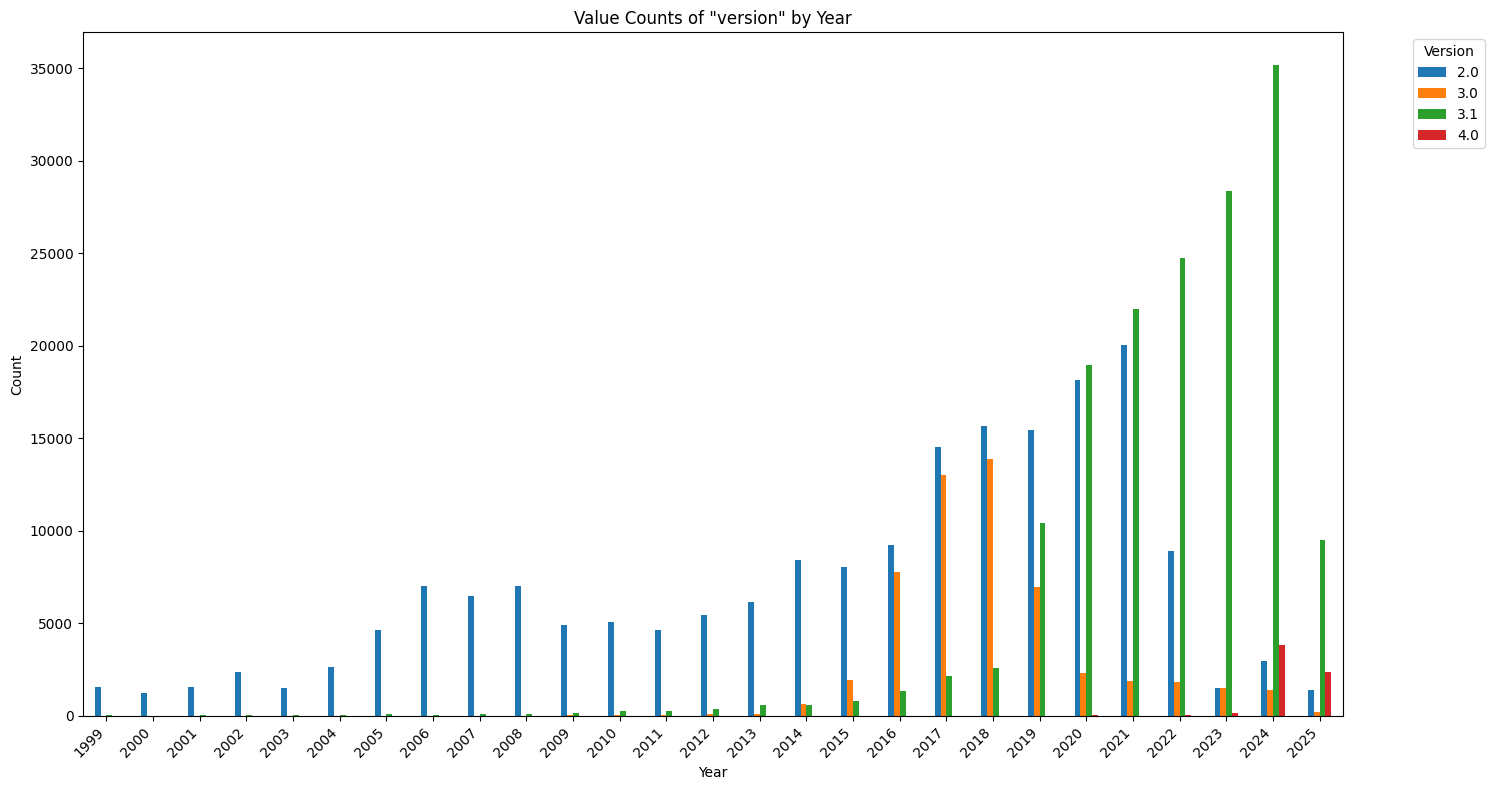

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# a barchart showing the value counts for 'version' for each year

# Extract the year from the 'id' column
df['year'] = df['id'].str.extract(r'CVE-(\d{4})-')[0].astype(int)

# Group by year and then count the occurrences of each version within each year
version_counts_by_year = df.groupby('year')['version'].value_counts().unstack(fill_value=0)

# Create a bar chart for each year
version_counts_by_year.plot(kind='bar', stacked=False, figsize=(15, 8))

plt.title('Value Counts of "version" by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Version', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
version_counts_by_year

version,2.0,3.0,3.1,4.0
year,,,,
1999,1540,0,27,0
2000,1236,2,11,0
2001,1537,0,36,0
2002,2356,0,61,0
2003,1503,2,23,0
2004,2644,3,42,0
2005,4626,3,72,1
2006,6992,5,62,0
2007,6449,7,68,0


In [ ]:
# seperate the dataset into different datasets based on the version
# Create a dictionary to store the DataFrames for each version
version_datasets = {}

# Iterate through the unique versions and create a separate DataFrame for each
for version in df['version'].unique():
    # Filter the original DataFrame for the current version
    # Use .copy() to avoid potential SettingWithCopyWarning
    version_datasets[version] = df[df['version'] == version].copy()

In [ ]:
for version, subset_df in version_datasets.items():
    filename = f'data_{version}.csv'
    subset_df.to_csv(filename, index=False)

In [ ]:
df_2 = pd.read_csv('/content/data_2.0.csv')
df_3 = pd.read_csv('/content/data_3.0.csv')
df_3_1 = pd.read_csv('/content/data_3.1.csv')
df_4 = pd.read_csv('/content/data_4.0.csv')

Generating heatmap for 2.0...


<ipython-input-38-770371c555fb>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_by_year = subset_df.groupby('year').apply(lambda x: x.isnull().sum())


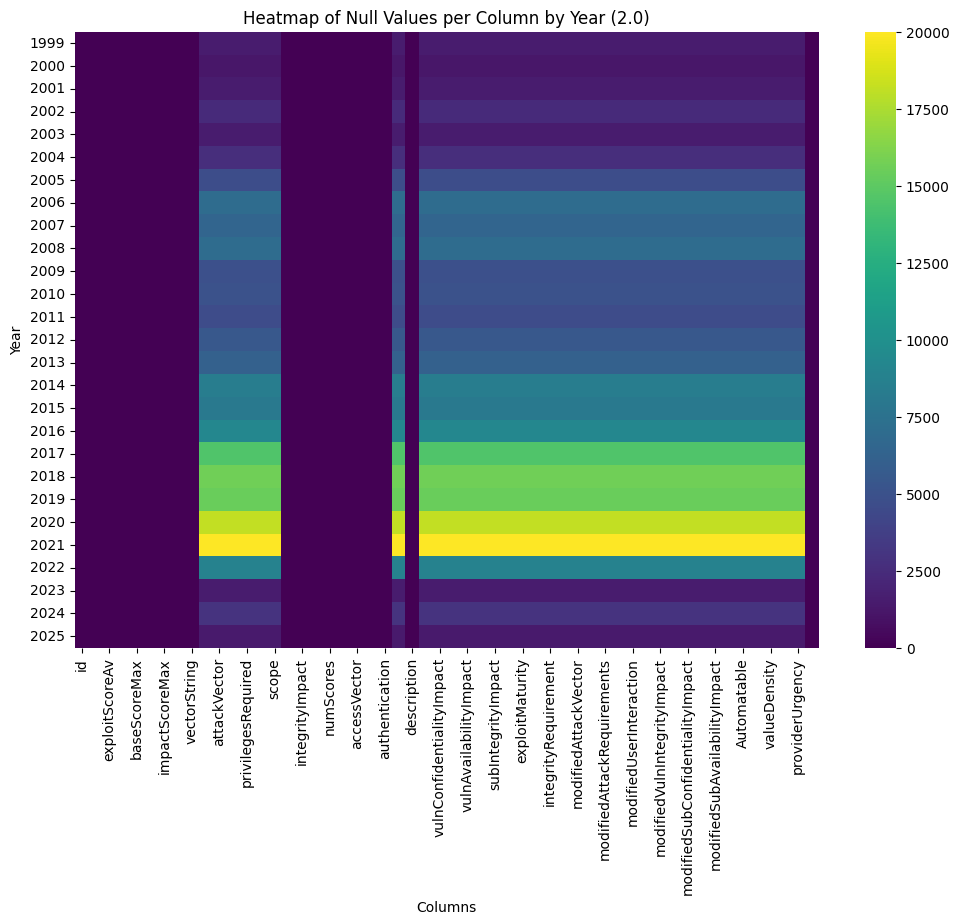

Generating heatmap for 3.1...


<ipython-input-38-770371c555fb>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_by_year = subset_df.groupby('year').apply(lambda x: x.isnull().sum())


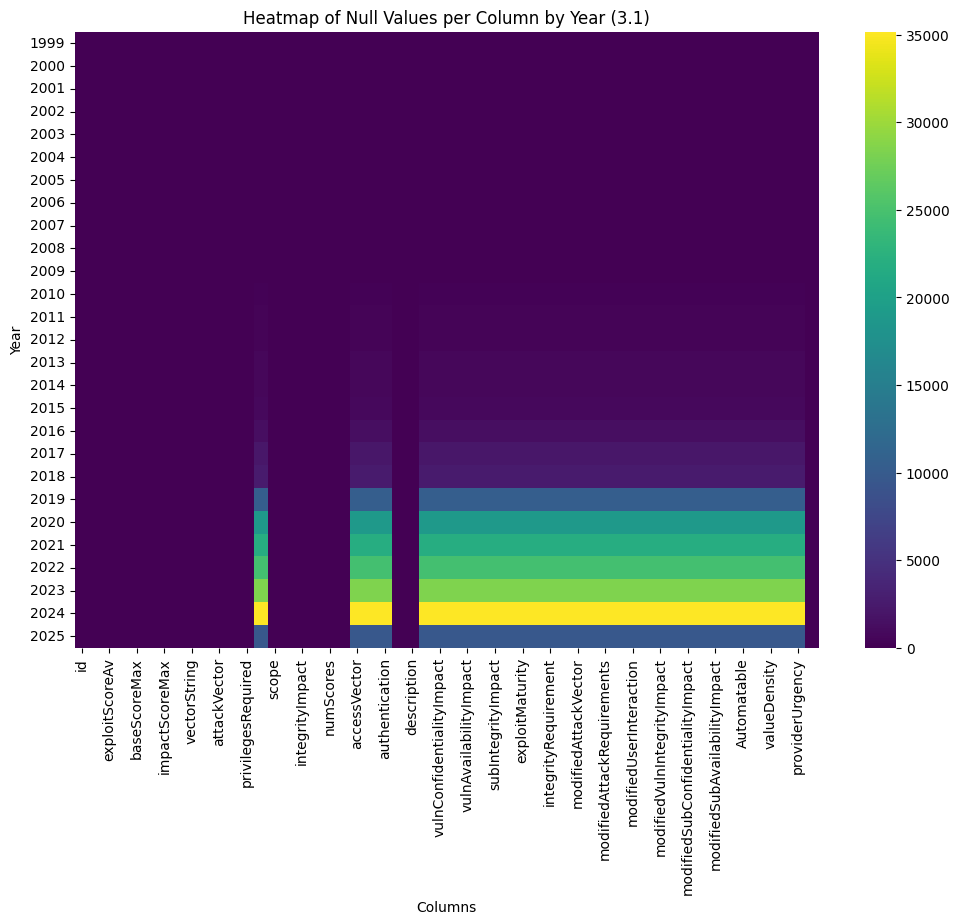

Generating heatmap for 3.0...


<ipython-input-38-770371c555fb>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_by_year = subset_df.groupby('year').apply(lambda x: x.isnull().sum())


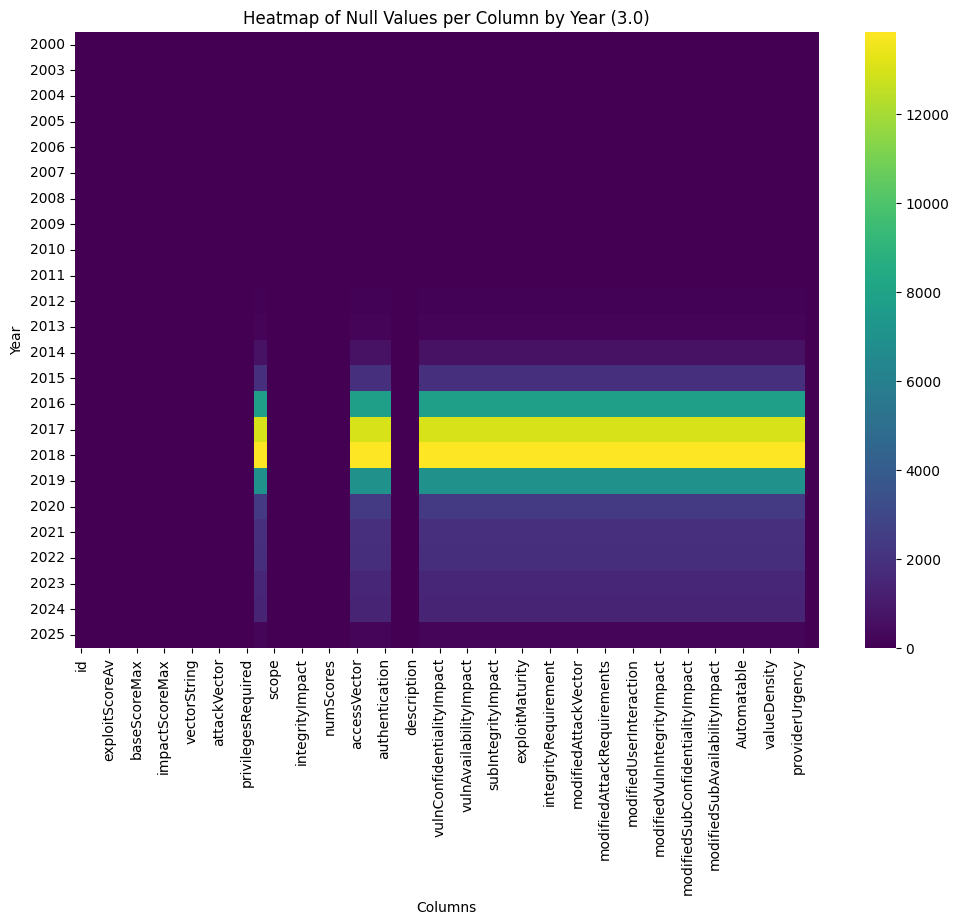

Generating heatmap for 4.0...


<ipython-input-38-770371c555fb>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_by_year = subset_df.groupby('year').apply(lambda x: x.isnull().sum())


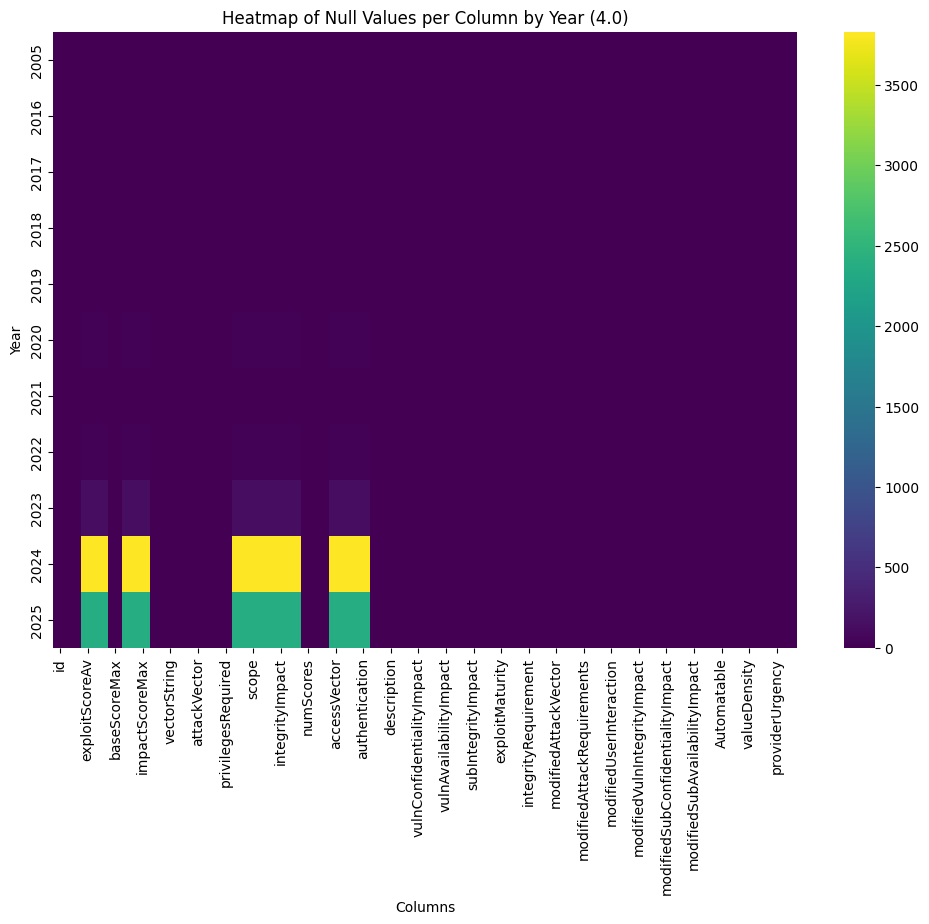

In [ ]:
# Iterate through the dictionary and create a heatmap for each DataFrame
for version, subset_df in version_datasets.items():
    print(f"Generating heatmap for {version}...")

    # Group by year and count nulls
    # Add include_groups=False to address the DeprecationWarning
    null_counts_by_year = subset_df.groupby('year').apply(lambda x: x.isnull().sum())

    # Create the heatmap
    plt.figure(figsize=(12, 8)) # Adjust figure size as needed
    sns.heatmap(null_counts_by_year, cmap='viridis')

    # Set the title based on the version name
    plt.title(f'Heatmap of Null Values per Column by Year ({version})')
    plt.xlabel('Columns')
    plt.ylabel('Year')

    # Show the plot for the current DataFrame
    plt.show()

In [ ]:
# Iterate through the dictionary and create a heatmap for each DataFrame
for version, subset_df in version_datasets.items():
    print(f'Version:{version}, Shape:{subset_df.shape}')

Version:2.0, Shape:(186366, 54)
Version:3.1, Shape:(158573, 54)
Version:3.0, Shape:(53460, 54)
Version:4.0, Shape:(6391, 54)


In [ ]:
for version, subset_df in version_datasets.items():
    print(f'Version: {version}, \n{subset_df.isnull().sum()}')

Version: 2.0, 
id                                        0
baseScoreAv                               0
exploitScoreAv                            0
impactScoreAv                             0
baseScoreMax                              0
exploitScoreMax                           0
impactScoreMax                            0
version                                   0
vectorString                              0
baseSeverity                         186366
attackVector                         186366
attackComplexity                     186366
privilegesRequired                   186366
userInteractions                     186366
scope                                186366
confidentialityImpact                     0
integrityImpact                           0
availabilityImpact                        0
numScores                                 0
agreement                                 0
accessVector                              0
accessComplexity                          0
authentication   

In [ ]:
# Iterate through the dictionary and create a heatmap for each DataFrame
for version, subset_df in version_datasets.items():
    print(f'Version:{version}, Shape:{subset_df.nunique()}')

Version:2.0, Shape:id                                   186366
baseScoreAv                              77
exploitScoreAv                           24
impactScoreAv                            10
baseScoreMax                             75
exploitScoreMax                          22
impactScoreMax                           10
version                                   1
vectorString                            370
baseSeverity                              0
attackVector                              0
attackComplexity                          0
privilegesRequired                        0
userInteractions                          0
scope                                     0
confidentialityImpact                     3
integrityImpact                           3
availabilityImpact                        3
numScores                                 2
agreement                                 2
accessVector                              3
accessComplexity                          3
authenticatio

In [ ]:
# Container to hold cleaned and renamed DataFrames
cleaned_renamed_subsets = []

for version, subset_df in version_datasets.items():
    # Drop columns with any null values
    cleaned_df = subset_df.dropna(axis=1)

    # Rename columns to include version, except 'id'
    renamed_columns = {
        col: f"{col}_v{version}" for col in cleaned_df.columns if col != 'id'
    }
    cleaned_df = cleaned_df.rename(columns=renamed_columns)

    cleaned_renamed_subsets.append(cleaned_df)

# Merge all cleaned and renamed DataFrames on 'id'
from functools import reduce
merged_df = reduce(lambda left, right: pd.merge(left, right, on='id', how='outer'), cleaned_renamed_subsets)

# Result: merged_df contains all versioned columns with suffixes
print(merged_df.head())

              id  baseScoreAv_v2.0  exploitScoreAv_v2.0  impactScoreAv_v2.0  \
0  CVE-1999-0001               5.0                 10.0                 2.9   
1  CVE-1999-0002              10.0                 10.0                10.0   
2  CVE-1999-0003              10.0                 10.0                10.0   
3  CVE-1999-0004               5.0                 10.0                 2.9   
4  CVE-1999-0005              10.0                 10.0                10.0   

   baseScoreMax_v2.0  exploitScoreMax_v2.0  impactScoreMax_v2.0  version_v2.0  \
0                5.0                  10.0                  2.9           2.0   
1               10.0                  10.0                 10.0           2.0   
2               10.0                  10.0                 10.0           2.0   
3                5.0                  10.0                  2.9           2.0   
4               10.0                  10.0                 10.0           2.0   

            vectorString_v2.0 confiden

In [ ]:
merged_df['id'].nunique()

275234

In [ ]:
len(merged_df['id'])

275234

In [ ]:
merged_df.shape

(275234, 102)

In [ ]:
print(merged_df.isnull().sum(), sep='\n')

id                                       0
baseScoreAv_v2.0                     88868
exploitScoreAv_v2.0                  88868
impactScoreAv_v2.0                   88868
baseScoreMax_v2.0                    88868
                                     ...  
Recovery_v4.0                       268843
valueDensity_v4.0                   268843
vulnerabilityResponseEffort_v4.0    268843
providerUrgency_v4.0                268843
year_v4.0                           268843
Length: 102, dtype: int64


In [ ]:
print(merged_df.columns)

Index(['id', 'baseScoreAv_v2.0', 'exploitScoreAv_v2.0', 'impactScoreAv_v2.0',
       'baseScoreMax_v2.0', 'exploitScoreMax_v2.0', 'impactScoreMax_v2.0',
       'version_v2.0', 'vectorString_v2.0', 'confidentialityImpact_v2.0',
       ...
       'modifiedSubConfidentialityImpact_v4.0',
       'modifiedSubIntegrityImpact_v4.0', 'modifiedSubAvailabilityImpact_v4.0',
       'Safety_v4.0', 'Automatable_v4.0', 'Recovery_v4.0', 'valueDensity_v4.0',
       'vulnerabilityResponseEffort_v4.0', 'providerUrgency_v4.0',
       'year_v4.0'],
      dtype='object', length=102)


In [ ]:
merged_df.drop(columns=['year_v4.0', 'year_v3.0', 'year_v3.1'], inplace=True)

<ipython-input-55-39f3305b7c3c>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_null_counts_by_year = merged_df.groupby('year_v2.0').apply(lambda x: x.isnull().sum())


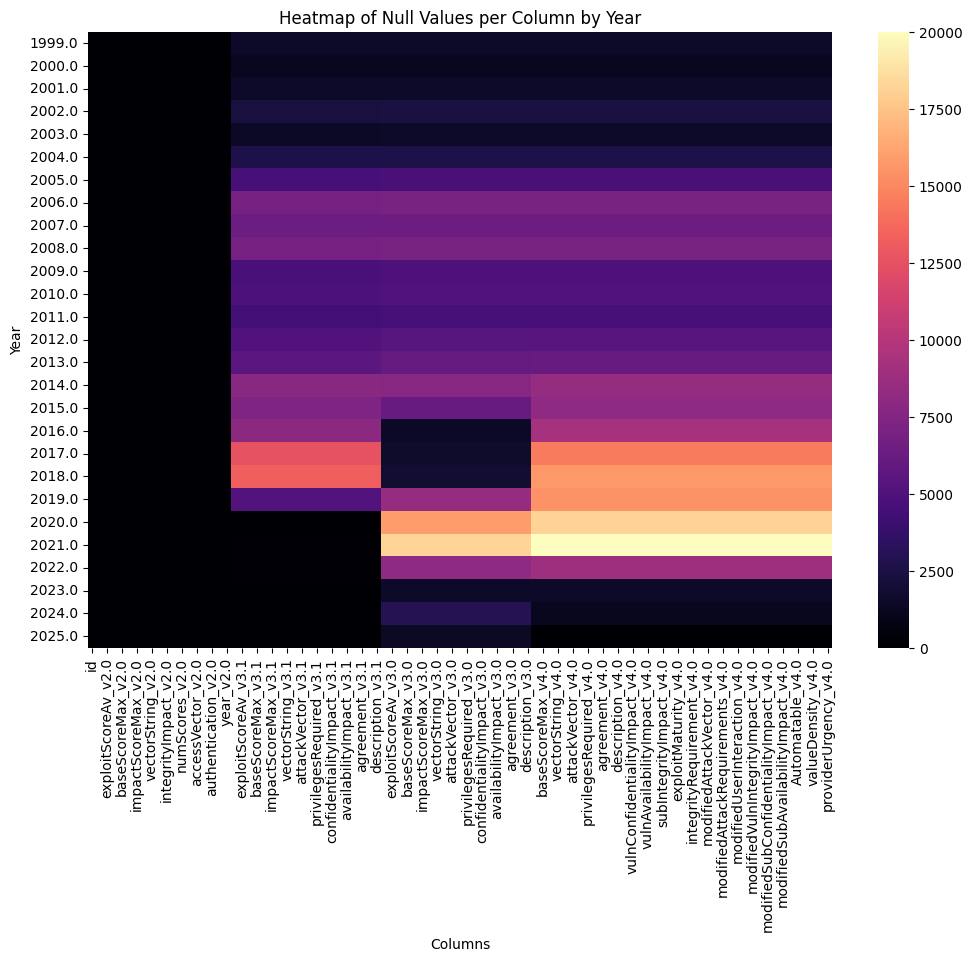

In [ ]:
# Group by year and count nulls
merged_null_counts_by_year = merged_df.groupby('year_v2.0').apply(lambda x: x.isnull().sum())

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_null_counts_by_year, cmap='magma')
plt.title('Heatmap of Null Values per Column by Year')
plt.xlabel('Columns')
plt.ylabel('Year')
plt.show()

In [ ]:
merged_null_counts_by_year

,id,baseScoreAv_v2.0,exploitScoreAv_v2.0,impactScoreAv_v2.0,baseScoreMax_v2.0,exploitScoreMax_v2.0,impactScoreMax_v2.0,version_v2.0,vectorString_v2.0,confidentialityImpact_v2.0,...,modifiedVulnAvailabilityImpact_v4.0,modifiedSubConfidentialityImpact_v4.0,modifiedSubIntegrityImpact_v4.0,modifiedSubAvailabilityImpact_v4.0,Safety_v4.0,Automatable_v4.0,Recovery_v4.0,valueDensity_v4.0,vulnerabilityResponseEffort_v4.0,providerUrgency_v4.0
year_v2.0,,,,,,,,,,,,,,,,,,,,,
1999.0,0,0,0,0,0,0,0,0,0,0,...,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540
2000.0,0,0,0,0,0,0,0,0,0,0,...,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236
2001.0,0,0,0,0,0,0,0,0,0,0,...,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537
2002.0,0,0,0,0,0,0,0,0,0,0,...,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356
2003.0,0,0,0,0,0,0,0,0,0,0,...,1503,1503,1503,1503,1503,1503,1503,1503,1503,1503
2004.0,0,0,0,0,0,0,0,0,0,0,...,2644,2644,2644,2644,2644,2644,2644,2644,2644,2644
2005.0,0,0,0,0,0,0,0,0,0,0,...,4625,4625,4625,4625,4625,4625,4625,4625,4625,4625
2006.0,0,0,0,0,0,0,0,0,0,0,...,6992,6992,6992,6992,6992,6992,6992,6992,6992,6992
2007.0,0,0,0,0,0,0,0,0,0,0,...,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/data_table.py", line 187, in _repr_mimebundle_
    dataframe = self._preprocess_dataframe()
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/colab/data_table.py", line 180, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py", line 6472, in reset_index
    new_obj.insert(
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py", line 5158, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert year_v2.0, already exists
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/data_table.py", line 199, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
                        ^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# read targets
dt = pd.read_csv('/content/drive/MyDrive/Cyber Security/known_exploited_vulnerabilities.csv')

print(dt.head())

            cveID vendorProject            product  \
0  CVE-2025-34028     Commvault     Command Center   
1  CVE-2024-58136  Yiiframework                Yii   
2  CVE-2024-38475        Apache        HTTP Server   
3  CVE-2023-44221     SonicWall  SMA100 Appliances   
4  CVE-2025-31324           SAP          NetWeaver   

                                   vulnerabilityName   dateAdded  \
0  Commvault Command Center Path Traversal Vulner...  2025-05-02   
1  Yiiframework Yii Improper Protection of Altern...  2025-05-02   
2  Apache HTTP Server Improper Escaping of Output...  2025-05-01   
3  SonicWall SMA100 Appliances OS Command Injecti...  2025-05-01   
4  SAP NetWeaver Unrestricted File Upload Vulnera...  2025-04-29   

                                    shortDescription  \
0  Commvault Command Center contains a path trave...   
1  Yii Framework contains an improper protection ...   
2  Apache HTTP Server contains an improper escapi...   
3  SonicWall SMA100 appliances contain an 

In [ ]:
merged_df['target'] = df['id'].apply(lambda x: 1 if x in dt['cveID'].values else 0)

print(df.head())

              id  baseScoreAv  exploitScoreAv  impactScoreAv  baseScoreMax  \
0  CVE-1999-0217          5.0            10.0            2.9           5.0   
1  CVE-1999-0702         10.0            10.0           10.0          10.0   
2  CVE-1999-0352          7.2             3.9           10.0           7.2   
3  CVE-1999-0978          7.5            10.0            6.4           7.5   
4  CVE-1999-0581         10.0            10.0           10.0          10.0   

   exploitScoreMax  impactScoreMax  version                vectorString  \
0             10.0             2.9      2.0  AV:N/AC:L/Au:N/C:N/I:N/A:P   
1             10.0            10.0      2.0  AV:N/AC:L/Au:N/C:C/I:C/A:C   
2              3.9            10.0      2.0  AV:L/AC:L/Au:N/C:C/I:C/A:C   
3             10.0             6.4      2.0  AV:N/AC:L/Au:N/C:P/I:P/A:P   
4             10.0            10.0      2.0  AV:N/AC:L/Au:N/C:C/I:C/A:C   

  baseSeverity  ... modifiedSubConfidentialityImpact  \
0          NaN  ...     

In [ ]:
# Show all columns in the DataFrame
pd.set_option('display.max_columns', None)

merged_df.columns

Index(['id', 'baseScoreAv_v2.0', 'exploitScoreAv_v2.0', 'impactScoreAv_v2.0',
       'baseScoreMax_v2.0', 'exploitScoreMax_v2.0', 'impactScoreMax_v2.0',
       'version_v2.0', 'vectorString_v2.0', 'confidentialityImpact_v2.0',
       'integrityImpact_v2.0', 'availabilityImpact_v2.0', 'numScores_v2.0',
       'agreement_v2.0', 'accessVector_v2.0', 'accessComplexity_v2.0',
       'authentication_v2.0', 'description_v2.0', 'year_v2.0',
       'baseScoreAv_v3.1', 'exploitScoreAv_v3.1', 'impactScoreAv_v3.1',
       'baseScoreMax_v3.1', 'exploitScoreMax_v3.1', 'impactScoreMax_v3.1',
       'version_v3.1', 'vectorString_v3.1', 'baseSeverity_v3.1',
       'attackVector_v3.1', 'attackComplexity_v3.1', 'privilegesRequired_v3.1',
       'scope_v3.1', 'confidentialityImpact_v3.1', 'integrityImpact_v3.1',
       'availabilityImpact_v3.1', 'numScores_v3.1', 'agreement_v3.1',
       'userInteraction_v3.1', 'description_v3.1', 'baseScoreAv_v3.0',
       'exploitScoreAv_v3.0', 'impactScoreAv_v3.0', 'ba

In [ ]:
merged_df.nunique()

,0
id,275234
baseScoreAv_v2.0,77
exploitScoreAv_v2.0,24
impactScoreAv_v2.0,10
baseScoreMax_v2.0,75
...,...
Recovery_v4.0,4
valueDensity_v4.0,3
vulnerabilityResponseEffort_v4.0,4
providerUrgency_v4.0,5


In [ ]:
merged_df.drop(columns=['description_v3.1', 'description_v3.0', 'description_v4.0'], inplace=True)

In [ ]:
print(merged_df.columns)

Index(['id', 'baseScoreAv_v2.0', 'exploitScoreAv_v2.0', 'impactScoreAv_v2.0',
       'baseScoreMax_v2.0', 'exploitScoreMax_v2.0', 'impactScoreMax_v2.0',
       'version_v2.0', 'vectorString_v2.0', 'confidentialityImpact_v2.0',
       'integrityImpact_v2.0', 'availabilityImpact_v2.0', 'numScores_v2.0',
       'agreement_v2.0', 'accessVector_v2.0', 'accessComplexity_v2.0',
       'authentication_v2.0', 'description_v2.0', 'year_v2.0',
       'baseScoreAv_v3.1', 'exploitScoreAv_v3.1', 'impactScoreAv_v3.1',
       'baseScoreMax_v3.1', 'exploitScoreMax_v3.1', 'impactScoreMax_v3.1',
       'version_v3.1', 'vectorString_v3.1', 'baseSeverity_v3.1',
       'attackVector_v3.1', 'attackComplexity_v3.1', 'privilegesRequired_v3.1',
       'scope_v3.1', 'confidentialityImpact_v3.1', 'integrityImpact_v3.1',
       'availabilityImpact_v3.1', 'numScores_v3.1', 'agreement_v3.1',
       'userInteraction_v3.1', 'baseScoreAv_v3.0', 'exploitScoreAv_v3.0',
       'impactScoreAv_v3.0', 'baseScoreMax_v3.0', 'e

In [ ]:
# drop evrtyhting from 2015 and before
merged_df = merged_df[merged_df['year_v2.0'] > 2015]

In [ ]:
merged_df.to_csv('merged_df.csv', index=False)